In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 98.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
true_news = pd.read_csv("/root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1/True.csv")
fake_news = pd.read_csv("/root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1/Fake.csv")
true_news.head()
fake_news.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true_news['label'] = 1   # 1 = Real
fake_news['label'] = 0   # 0 = Fake
true_news.head()
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df = pd.concat([true_news, fake_news])
df = df.sample(frac=1).reset_index(drop=True)
print(df)
print(df.shape)

                                                   title  \
0      How Trump, Clinton would fix the 'crazy' U.S. ...   
1      Giuliani sought to end prosecution of Turk in ...   
2      TREY GOWDY ON CROOKED DNC: ‘There May Be Somet...   
3      Factbox: How will Spain's central government t...   
4       Romania names new minister to modernize military   
...                                                  ...   
44893  CROOKED HILLARY’S BIGGEST NIGHTMARE: Brilliant...   
44894  TINA FEY Blasts ONLY White Women For Voting Fo...   
44895   Internet SLAMS Trump Over Mother’s Day Women’...   
44896   Neo-Nazis Think They Know Exactly Who Is Resp...   
44897  British PM May wants Northern Ireland's govern...   

                                                    text       subject  \
0      (Reuters) - When former President Bill Clinton...  politicsNews   
1      NEW YORK (Reuters) - Former New York City Mayo...  politicsNews   
2      Rep. Trey Gowdy was full of sarcasm (rightfull... 

In [15]:
from os import X_OK
X = df['text']
y = df['label']
print(X)
print(y)

0        (Reuters) - When former President Bill Clinton...
1        NEW YORK (Reuters) - Former New York City Mayo...
2        Rep. Trey Gowdy was full of sarcasm (rightfull...
3        MADRID (Reuters) - The Spanish government will...
4        BUCHAREST (Reuters) - Romania s leftist govern...
                               ...                        
44893    The movie that Hillary will NOT want America t...
44894     A lot of this election was turned by white, c...
44895    This morning our commander-in-chief wished Hap...
44896    After evidence surfaced that suggested Russia ...
44897    LONDON (Reuters) - Prime Minister Theresa May ...
Name: text, Length: 44898, dtype: object
0        1
1        1
2        0
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    1
Name: label, Length: 44898, dtype: int64


In [18]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)
print(X_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6848207 stored elements and shape (44898, 121689)>
  Coords	Values
  (0, 92300)	0.009500702192009127
  (0, 86160)	0.02711803306803644
  (0, 26202)	0.18491682308523097
  (0, 22306)	0.04153739527759851
  (0, 81955)	0.024346166257077743
  (0, 78522)	0.2209480781705956
  (0, 29453)	0.08335788929707887
  (0, 117828)	0.022594291309770826
  (0, 51365)	0.03069982066152329
  (0, 32054)	0.0342674319729178
  (0, 45396)	0.020354575938337807
  (0, 75646)	0.02090503476114359
  (0, 11745)	0.034720971869027506
  (0, 91740)	0.05184956781792384
  (0, 93070)	0.023946192126493463
  (0, 86159)	0.04266117396427314
  (0, 35238)	0.010396772075787352
  (0, 110530)	0.0657334954453885
  (0, 116393)	0.0960068202507946
  (0, 96739)	0.03399913299535629
  (0, 72991)	0.01631502126634855
  (0, 71582)	0.04248817666646947
  (0, 11643)	0.18263843164387933
  (0, 55718)	0.25453854380112
  (0, 29197)	0.09902868574657958
  :	:
  (44896, 61208)	0.09708036307750502


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9329621380846325


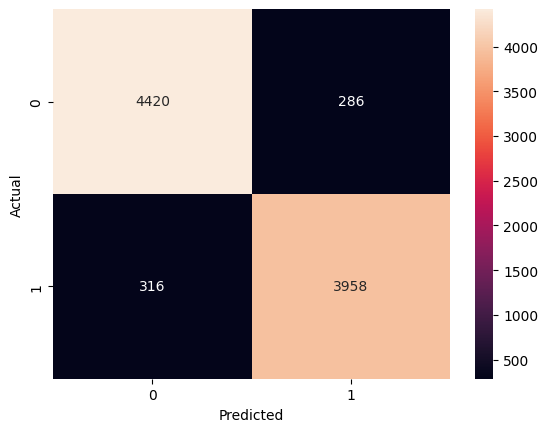

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4706
           1       0.93      0.93      0.93      4274

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [24]:
news = ["Breaking: Scientists confirm water found on Mars"]

news_vector = vectorizer.transform(news)
prediction = model.predict(news_vector)

if prediction[0] == 1:
    print("REAL NEWS ✅")
else:
    print("FAKE NEWS ❌")


FAKE NEWS ❌


In [25]:
import pickle

with open("fake_news_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)


In [26]:
from google.colab import files

files.download("fake_news_model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>